# Capstone Project - The Battle of the Neighborhoods (Week 2)


## Business Problem

Toronto is a pet friendly city. There are a lot of great outdoor spaces for dogs and over 50 off-leash areas across the city. The number of registered dogs in Toronto is around 80,000 which is approximately one third of total dogs in Toronto and it is continuously growing. And not only dogs, the number of cats and other pets is increasing. Overall, approximately 41% of households include at least one dog, and similarly around 37% include at least one cat according to Canadian Animal Health Institute. Pets need good veterinary care and there are many veterinary clinics in Toronto, but **there are areas in the city that have relatively small number of veterinary services compared to number of pets.**
In this project we will try to find an **optimal location for a veterinary clinic**. This report will be targeted to **veterinarians** interested in opening **a veterinary clinic** in **Toronto**.
Veterinary practices can be expensive to start. Depending on the size of the practice, location, and other factors, expect to spend a large amount of money on renovations, equipment, fixtures, and more. Choosing an area that isn’t saturated with clinics and with lots of pets will help ensure regular business.
We will try to find the **locations with no veterinary clinics or low number of veterinary services compared to number of pets.**

Using data science, we will detect the best neighborhoods to open a veterinary clinic based on the above criteria. We will then explore and highlight advantages of few neighborhoods so that the stakeholders can choose the best location for the veterinary clinic.

## Data <a name="data"></a>

To solve the business problem, we need the following data:
* The latest licensed dogs and cats report by forward station area (FSA)
  (We will use cats and dog data as their number is much bigger than number of other pets)
* The historical licensed dogs and cats reports by forward station area
  (We need historical data to see the trends)
* List of Toronto neighborhoods with FSA
* Number and location of existing veterinary clinics in each neighborhood

We can get the dogs and cats reports from https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/licensed-dogs-and-cats-reports </br>
We will get the list of Toronto neighborhoods with FSA from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M using the BeautifulSoup library for Python to scrap the web page.</br>
Number and location of existing veterinary clinics in each neighborhood will be obtained using Foursquare API.

### Importing Data

First, we will import the cats and dogs data, clean it and explore it and then we will do the same for the eighborhoods data.

In [1]:
import pandas as pd
#Take only FSA and Total columns
df_cats_dogs_2020 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/b7e67ff9-7d58-4e8f-a4c7-3057416244e5/download/2020-to-september-30-dog-and-cat-licences-by-forward-sortation-area.xls', usecols=[0,3], skiprows=3)
df_cats_dogs_2019 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/dcf8954e-345f-4c5d-a039-945aca56e606/download/2019-dog-and-cat-licences-by-forward-sortation-area.xls', usecols=[0,3], skiprows=4)
df_cats_dogs_2018 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/61a31ba3-503a-4fce-ad23-e5005d3727fb/download/2018-dog-and-cat-licences-by-forward-sortation-area.xls', usecols=[0,3], skiprows=4)
df_cats_dogs_2017 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/dc91b1db-dff7-4dc2-88d1-6031faf5f941/download/by-forward-sortation-area-fsa-2017.xls', usecols=[0,3], skiprows=2)
df_cats_dogs_2016 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/932902b0-21e6-4a8e-9f2a-b4f3df5453bc/download/by-forward-sortation-area-fsa-2016.xls', usecols=[0,3], skiprows=2)
df_cats_dogs_2015 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/8ac516e4-9dd2-4d71-8a33-f74a9f2ce559/download/by-forward-sortation-area-fsa-2015.xls', usecols=[0,3], skiprows=2)
df_cats_dogs_2014 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/e9af254b-40be-4353-89c7-58a829bf2e67/download/by-forward-sortation-area-fsa-2014.xls', usecols=[0,3], skiprows=2)
df_cats_dogs_2013 = pd.read_excel ('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c9ae19a-e23f-47d0-a813-742548d9a593/resource/42f9ad30-8230-4d01-9e61-86e1965ceccf/download/by-forward-sortation-area-fsa-2013.xls', usecols=[0,3], skiprows=3)



### Explore the cats and dogs data

Let's take a look at the most recent data:

In [2]:
df_cats_dogs_2019.head()

,FSA,Total
0,M1A,1
1,M1B,747
2,M1C,964
3,M1E,1218
4,M1G,494


In [3]:
df_cats_dogs_2020.dtypes

FSA      object
Total     int64
dtype: object

In [4]:
df_cats_dogs_2019.dtypes

FSA      object
Total     int64
dtype: object

In [5]:
df_cats_dogs_2018.dtypes

FSA      object
Total     int64
dtype: object

In [6]:
df_cats_dogs_2017.dtypes

FSA      object
Total     int64
dtype: object

In [7]:
df_cats_dogs_2016.dtypes

Unnamed: 0    object
Total          int64
dtype: object

In [8]:
df_cats_dogs_2015.dtypes

Unnamed: 0    object
TOTAL          int64
dtype: object

In [9]:
df_cats_dogs_2014.dtypes

Unnamed: 0    object
TOTAL          int64
dtype: object

In [10]:
df_cats_dogs_2013.dtypes

Unnamed: 0    object
Total          int64
dtype: object

### Data Cleaning

We can see that some dataframes are missing the first column name and some have the "Total" column spelled in upper case. We need to fix that before merging the data.</br>
The idea is to merge the data into a single dataframe that contains the FSA code, totals for each year so that we can easily calculate the YoY % change in number of licensed pets, and we also need the columns to store latitude and longitude for each FSA.

In [11]:
df_cats_dogs_2016.rename(columns={ df_cats_dogs_2016.columns[0]: "FSA" }, inplace = True)
df_cats_dogs_2015.rename(columns={ df_cats_dogs_2015.columns[0]: "FSA" }, inplace = True)
df_cats_dogs_2014.rename(columns={ df_cats_dogs_2014.columns[0]: "FSA" }, inplace = True)
df_cats_dogs_2013.rename(columns={ df_cats_dogs_2013.columns[0]: "FSA" }, inplace = True)

df_cats_dogs_2020.rename(columns={'Total':'Total_2020'}, inplace = True)
df_cats_dogs_2019.rename(columns={'Total':'Total_2019'}, inplace = True)
df_cats_dogs_2018.rename(columns={'Total':'Total_2018'}, inplace = True)
df_cats_dogs_2017.rename(columns={'Total':'Total_2017'}, inplace = True)
df_cats_dogs_2016.rename(columns={'Total':'Total_2016'}, inplace = True)
df_cats_dogs_2015.rename(columns={'TOTAL':'Total_2015'}, inplace = True)
df_cats_dogs_2014.rename(columns={'TOTAL':'Total_2014'}, inplace = True)
df_cats_dogs_2013.rename(columns={'Total':'Total_2013'}, inplace = True)

Now we can merge dataframes:

In [12]:
data_frames = [df_cats_dogs_2013,df_cats_dogs_2014, df_cats_dogs_2015, df_cats_dogs_2016,df_cats_dogs_2017, df_cats_dogs_2018, df_cats_dogs_2019, df_cats_dogs_2020]

In [13]:
from functools import reduce
df_cats_dogs = reduce(lambda  left,right: pd.merge(left,right,on=['FSA'],
                                            how='outer'), data_frames)

In [14]:
df_cats_dogs.head()

,FSA,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020
0,M0M,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,M1B,967.0,961.0,905.0,919.0,912.0,872.0,747.0,441.0
2,M1C,1354.0,1332.0,1227.0,1190.0,1072.0,1053.0,964.0,591.0
3,M1E,1621.0,1574.0,1494.0,1447.0,1430.0,1386.0,1218.0,666.0
4,M1G,709.0,654.0,655.0,609.0,605.0,572.0,494.0,291.0


In [15]:
df_cats_dogs.shape

(140, 9)

Let's print the whole dataset:

In [16]:
for index, row in df_cats_dogs.iterrows():
    print(row["FSA"], row["Total_2013"], row["Total_2014"],row["Total_2015"],row["Total_2016"],row["Total_2017"],row["Total_2018"],row["Total_2019"],row["Total_2020"])

M0M 1.0 1.0 nan nan nan nan nan nan
M1B 967.0 961.0 905.0 919.0 912.0 872.0 747.0 441.0
M1C 1354.0 1332.0 1227.0 1190.0 1072.0 1053.0 964.0 591.0
M1E 1621.0 1574.0 1494.0 1447.0 1430.0 1386.0 1218.0 666.0
M1G 709.0 654.0 655.0 609.0 605.0 572.0 494.0 291.0
M1H 545.0 545.0 512.0 500.0 464.0 437.0 405.0 212.0
M1J 674.0 642.0 650.0 622.0 618.0 594.0 542.0 314.0
M1K 1042.0 1033.0 1003.0 1059.0 1107.0 954.0 834.0 502.0
M1L 833.0 823.0 834.0 793.0 809.0 773.0 686.0 385.0
M1M 976.0 942.0 924.0 852.0 877.0 835.0 700.0 427.0
M1N 1333.0 1312.0 1212.0 1256.0 1245.0 1143.0 995.0 633.0
M1P 826.0 808.0 822.0 815.0 798.0 749.0 640.0 382.0
M1R 791.0 793.0 758.0 742.0 755.0 678.0 595.0 343.0
M1S 677.0 663.0 671.0 630.0 615.0 621.0 521.0 327.0
M1T 598.0 550.0 571.0 556.0 590.0 583.0 513.0 320.0
M1V 724.0 668.0 675.0 663.0 615.0 620.0 515.0 331.0
M1W 736.0 678.0 644.0 639.0 670.0 613.0 545.0 385.0
M1X 161.0 171.0 155.0 187.0 148.0 146.0 155.0 81.0
M2H 523.0 525.0 517.0 538.0 529.0 492.0 433.0 249.0
M2J 8

There are null values but they can be dropped as they exist on FSA codes with very small numbers of cats and dogs (1 to 4). These numbers are outliers and should be removed:

In [17]:
# removing null values
df_cats_dogs = df_cats_dogs.dropna()

Let's print the data again:

In [18]:
for index, row in df_cats_dogs.iterrows():
    print(row["FSA"], row["Total_2013"], row["Total_2014"],row["Total_2015"],row["Total_2016"],row["Total_2017"],row["Total_2018"],row["Total_2019"],row["Total_2020"])

M1B 967.0 961.0 905.0 919.0 912.0 872.0 747.0 441.0
M1C 1354.0 1332.0 1227.0 1190.0 1072.0 1053.0 964.0 591.0
M1E 1621.0 1574.0 1494.0 1447.0 1430.0 1386.0 1218.0 666.0
M1G 709.0 654.0 655.0 609.0 605.0 572.0 494.0 291.0
M1H 545.0 545.0 512.0 500.0 464.0 437.0 405.0 212.0
M1J 674.0 642.0 650.0 622.0 618.0 594.0 542.0 314.0
M1K 1042.0 1033.0 1003.0 1059.0 1107.0 954.0 834.0 502.0
M1L 833.0 823.0 834.0 793.0 809.0 773.0 686.0 385.0
M1M 976.0 942.0 924.0 852.0 877.0 835.0 700.0 427.0
M1N 1333.0 1312.0 1212.0 1256.0 1245.0 1143.0 995.0 633.0
M1P 826.0 808.0 822.0 815.0 798.0 749.0 640.0 382.0
M1R 791.0 793.0 758.0 742.0 755.0 678.0 595.0 343.0
M1S 677.0 663.0 671.0 630.0 615.0 621.0 521.0 327.0
M1T 598.0 550.0 571.0 556.0 590.0 583.0 513.0 320.0
M1V 724.0 668.0 675.0 663.0 615.0 620.0 515.0 331.0
M1W 736.0 678.0 644.0 639.0 670.0 613.0 545.0 385.0
M1X 161.0 171.0 155.0 187.0 148.0 146.0 155.0 81.0
M2H 523.0 525.0 517.0 538.0 529.0 492.0 433.0 249.0
M2J 847.0 939.0 908.0 901.0 954.0 909.0 8

In [19]:
df_cats_dogs = df_cats_dogs.set_index('FSA').reset_index()
df_cats_dogs.head()

,FSA,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020
0,M1B,967.0,961.0,905.0,919.0,912.0,872.0,747.0,441.0
1,M1C,1354.0,1332.0,1227.0,1190.0,1072.0,1053.0,964.0,591.0
2,M1E,1621.0,1574.0,1494.0,1447.0,1430.0,1386.0,1218.0,666.0
3,M1G,709.0,654.0,655.0,609.0,605.0,572.0,494.0,291.0
4,M1H,545.0,545.0,512.0,500.0,464.0,437.0,405.0,212.0


In [20]:
df_cats_dogs.describe()

,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000
mean,839.593750,834.375000,831.156250,831.43750,843.208333,806.833333,726.510417,449.625000
std,460.999431,455.704943,451.604935,452.87121,460.164888,442.141598,401.971903,253.004608
min,30.000000,34.000000,34.000000,33.00000,44.000000,49.000000,46.000000,43.000000
25%,519.000000,517.250000,515.750000,499.75000,511.500000,486.000000,429.500000,246.500000
50%,805.000000,787.500000,786.500000,787.50000,803.500000,744.000000,650.000000,394.000000
75%,1056.250000,1106.000000,1135.750000,1190.50000,1200.750000,1133.250000,995.250000,628.250000
max,1880.000000,1879.000000,1904.000000,1869.00000,1864.000000,1805.000000,1694.000000,1022.000000


The data looks good now.</br>
The next step is to add geo locations so that we can visualize data:

### Explore the cats and dogs data

#### Let's get the geo locations for each FSA and add it to the dataframe

First, add the Latitude and Longitude columns:

In [21]:
import numpy as np
df_cats_dogs.insert(loc=9, column = 'Latitude', value = np.NaN)
df_cats_dogs.insert(loc=10, column = 'Longitude', value = np.NaN)

In [22]:
!pip install geocoder
import os
import geocoder
import requests
GOOGLE_API_KEY = '' 
print("Libraries Imported.")

Libraries Imported.


In [23]:
def get_lat_long(address):
    lat, lng = None, None
    api_key = GOOGLE_API_KEY
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    endpoint = f"{base_url}?address={address}&key={api_key}"
    request = requests.get(endpoint)
    if request.status_code not in range(200, 299):
        return None, None
    try:
        results = request.json()['results'][0]
        lat = results['geometry']['location']['lat']
        lng = results['geometry']['location']['lng']
    except:
        pass
    return lat, lng

In [24]:
for index, row in df_cats_dogs.iterrows():
    lat, lon = get_lat_long(row['FSA'] + ", Toronto")
    df_cats_dogs.loc[index, 'Latitude'] = lat
    df_cats_dogs.loc[index, 'Longitude'] = lon
    print('.', sep=' ', end='', flush=True)
df_cats_dogs.head()    

................................................................................................

,FSA,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Latitude,Longitude
0,M1B,967.0,961.0,905.0,919.0,912.0,872.0,747.0,441.0,43.806686,-79.194353
1,M1C,1354.0,1332.0,1227.0,1190.0,1072.0,1053.0,964.0,591.0,43.784535,-79.160497
2,M1E,1621.0,1574.0,1494.0,1447.0,1430.0,1386.0,1218.0,666.0,43.763573,-79.188711
3,M1G,709.0,654.0,655.0,609.0,605.0,572.0,494.0,291.0,43.770992,-79.216917
4,M1H,545.0,545.0,512.0,500.0,464.0,437.0,405.0,212.0,43.773136,-79.239476


In [25]:
df_cats_dogs.shape

(96, 11)

#### Let's see where the cats and dogs are on the map:
We will display the most recent data (2020)

In [26]:
#!pip install folium
import folium

First, let's find geo location of downtown Toronto using Google Maps geocoding API:

In [27]:
address = 'Downtown Toronto, ON, Canada'
latitude_toronto, longitude_toronto = get_lat_long(address)
toronto_downtown = [latitude_toronto, longitude_toronto]
print("Downtown Toronto","latitude",latitude_toronto, "& " "longitude" ,longitude_toronto)

Downtown Toronto latitude 43.6548046 & longitude -79.3883031


In [28]:
map_toronto = folium.Map(location=toronto_downtown, zoom_start=13)
folium.Marker(toronto_downtown, popup='Toronto').add_to(map_toronto)
for i in range(0,len(df_cats_dogs)):  
    folium.Circle(
      location=[df_cats_dogs.iloc[i]['Latitude'], df_cats_dogs.iloc[i]['Longitude']],
      popup=df_cats_dogs.iloc[i]['FSA'] + ":" + str(df_cats_dogs.iloc[i]['Total_2020']),
      radius=float(df_cats_dogs.iloc[i]['Total_2020'])/1.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
    ).add_to(map_toronto)
    folium.Marker(toronto_downtown, popup='Toronto').add_to(map_toronto)
map_toronto

The data looks good. Now, we need to import neighborhood data.

### Scrapping the data from a Wikipedia page that contains a table with postal codes and neighborhood names

We will use the BeautifulSoup to extract the data from a table on Wikipedia.

In [29]:
import requests # library to handle requests
from html_table_extractor.extractor import Extractor
from bs4 import BeautifulSoup
from IPython.display import display_html

In [30]:
#Scrap of the data of Wikipedia and explore it
data_source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(data_source, 'html.parser')
extractor = Extractor(soup.table) 
a = extractor.parse()
neighborhoods_list=extractor.return_list()
display_html(str(soup.table),raw=True)

Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [31]:
df = pd.DataFrame (neighborhoods_list,columns=['Postal Code','Borough','Neighborhood'])
df = df.iloc[1:]
df.head()

,Postal Code,Borough,Neighborhood
1,M1A\n,Not assigned\n,Not assigned\n
2,M2A\n,Not assigned\n,Not assigned\n
3,M3A\n,North York\n,Parkwoods\n
4,M4A\n,North York\n,Victoria Village\n
5,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


### Clean the neighborhood data
* Remove \n at the end of each cell value
* Drop the rows that have the value of Borough equal to "Not assigned"
* Rename the "Postal Code" column to "FSA"

In [32]:
df_toronto_Neighborhoods = df.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)

df_toronto_Neighborhoods.reset_index(inplace=True)

#Removing \n
for index, row in df_toronto_Neighborhoods.iterrows():
    row['Postal Code'] = row['Postal Code'].replace('\n','')
    row['Borough'] = row['Borough'].replace('\n','')
    row['Neighborhood'] = row['Neighborhood'].replace('\n','')
    if row['Neighborhood'].find(",")>0:
        row['Neighborhood'] = row['Neighborhood'][0:row['Neighborhood'].replace('\n','').find(",")]
#Dropping of rows if the value of Borough is "Not assigned"
df_toronto_Neighborhoods = df_toronto_Neighborhoods[df_toronto_Neighborhoods['Borough'] != 'Not assigned']
df_toronto_Neighborhoods.rename(columns={'Postal Code':'FSA'},inplace=True)
df_toronto_Neighborhoods.head()

,FSA,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park
5,M6A,North York,Lawrence Manor
6,M7A,Downtown Toronto,Queen's Park


In [33]:
df_toronto_Neighborhoods.shape

(103, 3)

In [34]:
for index, row in df_toronto_Neighborhoods.iterrows():
    lat, lon = get_lat_long(row['FSA'] + ", Toronto")
    df_toronto_Neighborhoods.loc[index, 'Neighborhood Latitude'] = lat
    df_toronto_Neighborhoods.loc[index, 'Neighborhood Longitude'] = lon
    print('.', sep=' ', end='', flush=True)
df_toronto_Neighborhoods.head()  

.......................................................................................................

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
5,M6A,North York,Lawrence Manor,43.718518,-79.464763
6,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


In [35]:
from geopy.distance import distance
df_neighborhoods_distances = pd.DataFrame(columns = ['FSA','Distance to Downtown'])
i=0
for lat_n, lng_n, fsa in zip(df_toronto_Neighborhoods['Neighborhood Latitude'], df_toronto_Neighborhoods['Neighborhood Longitude'], df_toronto_Neighborhoods['FSA']):  
    i = i + 1
    dv = distance([lat_n, lng_n], [latitude_toronto, longitude_toronto]).m
    df_neighborhoods_distances.loc[i] = [fsa] + [dv]
    

In [36]:
df_neighborhoods_distances.head()

,FSA,Distance to Downtown
1,M3A,11916.578307
2,M4A,9836.113532
3,M5A,2232.736527
4,M6A,9387.002356
5,M7A,838.466754


In [37]:
df_toronto_Neighborhoods = pd.merge(df_toronto_Neighborhoods, df_neighborhoods_distances, on='FSA',  how='left')

In [38]:
df_toronto_Neighborhoods.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown
0,M3A,North York,Parkwoods,43.753259,-79.329656,11916.578307
1,M4A,North York,Victoria Village,43.725882,-79.315572,9836.113532
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527
3,M6A,North York,Lawrence Manor,43.718518,-79.464763,9387.002356
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,838.466754


In [39]:
df_toronto_Neighborhoods = df_toronto_Neighborhoods.loc[(df_toronto_Neighborhoods['Distance to Downtown']<=7000)]

In [40]:
df_toronto_Neighborhoods.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,838.466754
9,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,799.642642
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1102.638211
16,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,5394.533092


In [41]:
null_rows = df_toronto_Neighborhoods[df_toronto_Neighborhoods['FSA'].isnull()]
null_rows

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown


The data looks good. There are no null values. We can now merge the pets and neighborhoods dataframes

In [42]:
df_neighborhoods_pets = pd.merge(df_toronto_Neighborhoods, df_cats_dogs, on='FSA',  how='left')
df_neighborhoods_pets.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527,966.0,1069.0,1192.0,1219.0,1365.0,1355.0,1307.0,837.0,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,838.466754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,799.642642,196.0,212.0,225.0,248.0,265.0,254.0,259.0,186.0,43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1102.638211,78.0,76.0,70.0,82.0,91.0,88.0,73.0,52.0,43.651494,-79.375418
4,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,5394.533092,983.0,934.0,939.0,964.0,964.0,939.0,812.0,531.0,43.693781,-79.428191


In [43]:
df_neighborhoods_pets.shape

(42, 16)

In [44]:
df_neighborhoods_pets = df_neighborhoods_pets.dropna()

In [45]:
df_neighborhoods_pets.shape

(35, 16)

In [46]:
df_neighborhoods_pets.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527,966.0,1069.0,1192.0,1219.0,1365.0,1355.0,1307.0,837.0,43.654260,-79.360636
2,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,799.642642,196.0,212.0,225.0,248.0,265.0,254.0,259.0,186.0,43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1102.638211,78.0,76.0,70.0,82.0,91.0,88.0,73.0,52.0,43.651494,-79.375418
4,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,5394.533092,983.0,934.0,939.0,964.0,964.0,939.0,812.0,531.0,43.693781,-79.428191
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1645.178245,138.0,150.0,187.0,223.0,229.0,244.0,246.0,176.0,43.644771,-79.373306


#### Let's visualize the neighborhoods data 

In [47]:
map_toronto = folium.Map(location=toronto_downtown, zoom_start=12)

for lat, lng, borough, neighborhood in zip(df_neighborhoods_pets['Latitude'], df_neighborhoods_pets['Longitude'], df_neighborhoods_pets['Borough'], df_neighborhoods_pets['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
map_toronto

We can now merge pets and Neighborhoods data:

### Using FourSquare API to get veterinary clinics information

#### Define Foursquare Credentials and Version

In [48]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180605'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WJAHFDK5MATOQHAAEUHK2OWFUJWW2OQEALX2J3AF4A4CJULG
CLIENT_SECRET:B1CRVB1UNXOCBVMQCDCCBGW5OGWUCRH1TKVHZCLGVK54FPH4


In [49]:
def get_venues( category_id, lat, lon, client_id, client_secret, version, radius=500, limit=100):

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lon, 
            radius, 
            limit,
            category_id)
    try:           
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                    item['venue']['name'],
                    item['venue']['categories'][0]['name'],
                    item['venue']['location']['lat'], 
                    item['venue']['location']['lng']
                  ) for item in results]        
    except:
        pass
    return venues

In [50]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's get all veterinary venues in radius of 10km of downtown Toronto.
The id of the veterinary venue in Foursquare is 4d954af4a243a5684765b473 </br>
We need the latitude and longitude of downtown Toronto which we already found in the previous section. It is (43.6548046,-79.3883031)

In [51]:
import numpy as np
all_veterinary_venues = get_venues("4d954af4a243a5684765b473", 43.6548046,-79.3883031, CLIENT_ID, CLIENT_SECRET, VERSION, radius=7000, limit=500)
arr = np.array(all_veterinary_venues)
df_all_veterinary_venues = pd.DataFrame(arr, columns = ['Venue Id', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude'])

In [52]:
df_all_veterinary_venues.shape

(30, 5)

In [53]:
df_all_veterinary_venues.head()

,Venue Id,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,4ae06ddef964a5203b7f21e3,Toronto Humane Society,Animal Shelter,43.65769802359708,-79.3565828808708
1,4b81644af964a52049a330e3,VEC Veterinary Emergency Clinic,Veterinarian,43.67397762493825,-79.38973071994448
2,4bd1dc14046076b0f0a77271,Spadina Animal Hospital,Veterinarian,43.64722300237428,-79.39565838078587
3,4db09bf70437a93f7f770755,Wellesley Animal Hospital,Veterinarian,43.66494103924063,-79.38458123431751
4,516ff685e4b03e954dae2613,Sherbourne Animal Hospital,Veterinarian,43.653999,-79.369174


In [54]:
df_all_veterinary_venues.dtypes

Venue Id           object
Venue Name         object
Venue Category     object
Venue Latitude     object
Venue Longitude    object
dtype: object

We need to convert Venue Latitude and Venue Longitude to float:

In [55]:
df_all_veterinary_venues[['Venue Latitude', 'Venue Longitude']] = df_all_veterinary_venues[['Venue Latitude', 'Venue Longitude']].apply(pd.to_numeric)

In [56]:
df_all_veterinary_venues.head()

,Venue Id,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,4ae06ddef964a5203b7f21e3,Toronto Humane Society,Animal Shelter,43.657698,-79.356583
1,4b81644af964a52049a330e3,VEC Veterinary Emergency Clinic,Veterinarian,43.673978,-79.389731
2,4bd1dc14046076b0f0a77271,Spadina Animal Hospital,Veterinarian,43.647223,-79.395658
3,4db09bf70437a93f7f770755,Wellesley Animal Hospital,Veterinarian,43.664941,-79.384581
4,516ff685e4b03e954dae2613,Sherbourne Animal Hospital,Veterinarian,43.653999,-79.369174


In [57]:
df_neighborhoods_pets.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527,966.0,1069.0,1192.0,1219.0,1365.0,1355.0,1307.0,837.0,43.654260,-79.360636
2,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,799.642642,196.0,212.0,225.0,248.0,265.0,254.0,259.0,186.0,43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1102.638211,78.0,76.0,70.0,82.0,91.0,88.0,73.0,52.0,43.651494,-79.375418
4,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,5394.533092,983.0,934.0,939.0,964.0,964.0,939.0,812.0,531.0,43.693781,-79.428191
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1645.178245,138.0,150.0,187.0,223.0,229.0,244.0,246.0,176.0,43.644771,-79.373306


Let's display the venues on the map:

In [58]:
map_toronto_venues = folium.Map(location=toronto_downtown, zoom_start=12)
for lat, lng, venue in zip(df_all_veterinary_venues['Venue Latitude'], df_all_veterinary_venues['Venue Longitude'], df_all_veterinary_venues['Venue Name']):
    label = '{}'.format(venue)
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_venues)  
map_toronto_venues

#### Calculate the distance from each neighborhood to all venues

We will need the distance from neighborhoods to venues as this will be one of the parameters for clustering the neighborhoods and finding the optimal location for a new venue.
we will use geopy library to measure distances.

In [59]:
df_venue_distances = pd.DataFrame(columns = ['FSA','Venue Id','Venue Name','Venue Latitude','Venue Longitude','Distance to Venue'])
i=0
for lat_n, lng_n, fsa in zip(df_neighborhoods_pets['Neighborhood Latitude'], df_neighborhoods_pets['Neighborhood Longitude'], df_neighborhoods_pets['FSA']):
    for lat_v, lng_v, id_v, name_v in zip(df_all_veterinary_venues['Venue Latitude'], df_all_veterinary_venues['Venue Longitude'], df_all_veterinary_venues['Venue Id'], df_all_veterinary_venues['Venue Name']):
        i = i + 1
        dv = distance([lat_n, lng_n], [lat_v, lng_v]).m
        df_venue_distances.loc[i] = [fsa]+[id_v]+[name_v]+[lat_v]+[lng_v] + [dv]

  


In [60]:
df_venue_distances = df_venue_distances.sort_values(by=['FSA','Distance to Venue'])

In [61]:
df_venue_distances.head()

,FSA,Venue Id,Venue Name,Venue Latitude,Venue Longitude,Distance to Venue
209,M4G,4d0e496abe6d6ea8fd8409b5,Laird-Eglinton Veterinary Clinic,43.711637,-79.363188,287.065054
206,M4G,4bfef25ee584c928507d6d25,Mt. Pleasant-Davisville Veterinary Hospital,43.707383,-79.389939,2142.959477
198,M4G,4be09b3498f2a5931fcdc25a,Blue Cross Animal Hospital,43.676483,-79.357924,3646.883571
182,M4G,4b81644af964a52049a330e3,VEC Veterinary Emergency Clinic,43.673978,-79.389731,4436.477241
210,M4G,4bb39598eb3e9521f858cb0a,Woodbine Animal Hospital,43.684827,-79.316420,4650.165320


We have all the data that we need to solve the business problem:

*  Licensed dogs and cats reports by forward station area for 2013 to September 2020.
*  Toronto neighborhood list with FSA codes
*  All the venues in Toronto area categorized as veterinary services in Foursquare

We cleaned the data (removed outliers and null values, restored the missing column names).

Then we used Google geocoding API to get the latitude and longitude for each FSA.

We explored the data, displayed it on the map.

Finally, we used Geopy to calculate the distance from neighborhoods to the venues.>/br>historical licensed dogs and cats reports by forward station area

This concluded the Data section.



## Methodology

We will use the following parameters to detects areas it Toronto that are good candidates for opening a veterinary service:

* Number of existing veterinary services in each neighborhood.</br>
  In the Data section we found top 5 closest veterinary vanues for each neighborhood. Using that information, we will calculate the average distance to the nearest venue and then find all the venues in each neighborhood within that range.
  
* Venue density - the ratio between the number of existing veterinary services and total number of cats and dogs in the area.

* The average annual growth rate of number of pets.</br>
  We will use the data that we collected from the cats and dogs reports for 2013 to 2020 to calculate this value for each neighborhood.
  
Once we calculate the above parameters, we will explore and visualize the data using different map styles. For example: To see how far are the venues from the center of each neighborhood, the density of veterinary clinics, etc. This will help us to understand which areas to select for further analasys and clustering.

We will then create clusters of locations based on the criteria we defined after data exploration. For example: number of existing venues in each neighborhood is less than 3, the distance to the nearest venue is grater that 5 km, the average annual growth rate of number of pets is greater than certain percentag, etc. We will have a good idea of what the criteria should be after we explore and visualize the data.

After that we will use k-means clustering algorithm to create clusters of locations based on the criteria that we identified.

Finally, we will visualize the clusters, identify the most promising locations and explore the data in order to narrow down the findings and select the best venue locations that will be presented to the stakeholders.

In [62]:
avg_distance = df_venue_distances['Distance to Venue'].mean()

In [63]:
print('average distance to closest veterinary clinic from each neighborhood center:', df_venue_distances['Distance to Venue'].mean())

average distance to closest veterinary clinic from each neighborhood center: 4656.72319093109


In [64]:
df_fsa_venues = df_venue_distances.loc[(df_venue_distances['Distance to Venue'] <= 1500)]

Identify the venues in each neighborhood within the range of average distance:

Now, let's count the number of venues for each FSA:

In [65]:
df_fsa_venues_count = df_fsa_venues[["FSA","Venue Id"]].groupby("FSA").count()

In [66]:
df_fsa_venues_count.rename(columns={"Venue Id": "Venue Count"}, inplace=True)

In [67]:
df_fsa_venues_count.shape

(27, 1)

In [68]:
df_fsa_venues_count.head()

,Venue Count
FSA,
M4G,1
M4H,1
M4K,1
M4M,3
M4P,1


We can now add the venue count to the main dataframe:

In [69]:
df_neighborhoods_pets = pd.merge(df_neighborhoods_pets, df_fsa_venues_count, on='FSA',  how='left')

In [70]:
# Replace NaN values of Venue Count with 0
df_neighborhoods_pets = df_neighborhoods_pets.fillna(0)

In [71]:
df_neighborhoods_pets = df_neighborhoods_pets.drop(columns=['Latitude','Longitude']) 

In [72]:
df_neighborhoods_pets.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Venue Count
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527,966.0,1069.0,1192.0,1219.0,1365.0,1355.0,1307.0,837.0,2.0
1,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,799.642642,196.0,212.0,225.0,248.0,265.0,254.0,259.0,186.0,3.0
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1102.638211,78.0,76.0,70.0,82.0,91.0,88.0,73.0,52.0,1.0
3,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,5394.533092,983.0,934.0,939.0,964.0,964.0,939.0,812.0,531.0,4.0
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1645.178245,138.0,150.0,187.0,223.0,229.0,244.0,246.0,176.0,1.0


In [73]:
df_neighborhoods_pets.shape

(35, 15)

We have the number of venues in each neighborhood, so let's calculate the venue density using the total number of pets in 2019:

In [74]:
df_neighborhoods_pets["Venue Density"] = 100 * df_neighborhoods_pets["Venue Count"]/(df_neighborhoods_pets["Total_2020"].replace(0,1))

The last measure that we need to calculate is the average annual growth rate of number of pets. We will exclude the 2020 data since it is incomplete.

In [75]:
df_neighborhoods_pets["avg_roc"] = 100*((df_neighborhoods_pets["Total_2014"] - df_neighborhoods_pets["Total_2013"])/df_neighborhoods_pets["Total_2013"] +
                                    (df_neighborhoods_pets["Total_2015"] - df_neighborhoods_pets["Total_2014"])/df_neighborhoods_pets["Total_2014"] + 
                                    (df_neighborhoods_pets["Total_2016"] - df_neighborhoods_pets["Total_2015"])/df_neighborhoods_pets["Total_2015"] + 
                                    (df_neighborhoods_pets["Total_2017"] - df_neighborhoods_pets["Total_2016"])/df_neighborhoods_pets["Total_2016"] + 
                                    (df_neighborhoods_pets["Total_2018"] - df_neighborhoods_pets["Total_2017"])/df_neighborhoods_pets["Total_2017"] + 
                                    (df_neighborhoods_pets["Total_2019"] - df_neighborhoods_pets["Total_2018"])/df_neighborhoods_pets["Total_2018"])/6

In [76]:
df_neighborhoods_pets.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Venue Count,Venue Density,avg_roc
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,2232.736527,966.0,1069.0,1192.0,1219.0,1365.0,1355.0,1307.0,837.0,2.0,0.238949,5.355950
1,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,799.642642,196.0,212.0,225.0,248.0,265.0,254.0,259.0,186.0,3.0,1.612903,4.864994
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1102.638211,78.0,76.0,70.0,82.0,91.0,88.0,73.0,52.0,1.0,1.923077,-0.447088
3,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,5394.533092,983.0,934.0,939.0,964.0,964.0,939.0,812.0,531.0,4.0,0.753296,-2.984232
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1645.178245,138.0,150.0,187.0,223.0,229.0,244.0,246.0,176.0,1.0,0.568182,10.445688


In [77]:
df_venue_locations = df_fsa_venues[["Venue Latitude","Venue Longitude"]].apply(pd.to_numeric)
df_venue_locations = df_venue_locations.drop_duplicates()
heat_data = [[row['Venue Latitude'],row['Venue Longitude']] for index, row in df_venue_locations.iterrows()]

In [78]:
map_toronto = folium.Map(location=toronto_downtown, zoom_start=12)
from folium.plugins import HeatMap
for lat, lng, fsa, neighborhood in zip(df_neighborhoods_pets['Neighborhood Latitude'], df_neighborhoods_pets['Neighborhood Longitude'], df_neighborhoods_pets['FSA'], df_neighborhoods_pets['Neighborhood'] ):
    label = '{}, {}'.format(neighborhood, fsa)
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
for lat, lng, venue in zip(df_all_veterinary_venues['Venue Latitude'], df_all_veterinary_venues['Venue Longitude'], df_all_veterinary_venues['Venue Name']):
    label = '{}'.format(venue)
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)
HeatMap(heat_data).add_to(map_toronto)
map_toronto

In [79]:
df_neighborhoods_pets_sorted = df_neighborhoods_pets.sort_values(by=['FSA'])

In [80]:
df_neighborhoods_pets_sorted.head()

,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Venue Count,Venue Density,avg_roc
6,M4G,East York,Leaside,43.709060,-79.363452,6352.478329,1090.0,1094.0,1057.0,1037.0,1079.0,1031.0,949.0,594.0,1.0,0.168350,-2.209854
9,M4H,East York,Thorncliffe Park,43.705369,-79.349372,6435.587977,124.0,123.0,125.0,99.0,126.0,114.0,104.0,70.0,1.0,1.428571,-1.833908
12,M4J,East York,East Toronto,43.685347,-79.338106,5282.454020,1725.0,1752.0,1665.0,1693.0,1681.0,1555.0,1437.0,939.0,0.0,0.000000,-2.918603
15,M4K,East Toronto,The Danforth West,43.679557,-79.352188,4005.956454,1436.0,1409.0,1371.0,1432.0,1400.0,1354.0,1224.0,784.0,1.0,0.127551,-2.541566
17,M4L,East Toronto,India Bazaar,43.668999,-79.315572,6074.808551,1880.0,1879.0,1904.0,1805.0,1828.0,1805.0,1694.0,985.0,0.0,0.000000,-1.675971


In [81]:
df_neighborhoods_pets_sorted = df_neighborhoods_pets_sorted.fillna(0)

In [82]:
df_neighborhoods_pets_locations = df_neighborhoods_pets_sorted[["Total_2020","Venue Count"]]

In [83]:
df_neighborhoods_pets_locations.head()

,Total_2020,Venue Count
6,594.0,1.0
9,70.0,1.0
12,939.0,0.0
15,784.0,1.0
17,985.0,0.0


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = df_neighborhoods_pets_locations[["Total_2020","Venue Count"]].copy()
X_train[["Total_2020","Venue Count"]] = scaler.fit_transform(X_train[["Total_2020","Venue Count"]])
X_train.head()

,Total_2020,Venue Count
6,0.294332,-0.602933
9,-1.518920,-0.602933
12,1.488172,-1.144026
15,0.951809,-0.602933
17,1.647351,-1.144026


In [102]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

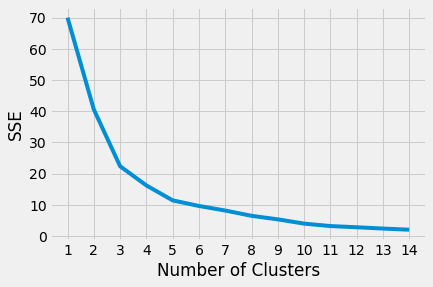

In [103]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [104]:
!pip install kneed
from kneed import KneeLocator
kl = KneeLocator(
   range(1, 15), sse, curve="convex", direction="decreasing"
)
print('Optimal number of clusters: ',kl.elbow)

Optimal number of clusters:  4


In [88]:
number_of_clusters = 4
x = X_train[["Total_2020","Venue Count"]].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(X_train)
y_kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit_predict(X_train)
kmeans.labels_

#cluster_centers = [xy_to_lonlat(cc[0], cc[1]) for cc in kmeans.cluster_centers_]

array([3, 1, 0, 0, 0, 2, 3, 3, 0, 3, 3, 3, 2, 2, 0, 1, 1, 1, 1, 1, 1, 3,
       3, 2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 0, 2])

In [89]:
df_neighborhoods_pets_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [90]:
df_neighborhoods_pets_sorted.head()

,Cluster Labels,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Venue Count,Venue Density,avg_roc
6,3,M4G,East York,Leaside,43.709060,-79.363452,6352.478329,1090.0,1094.0,1057.0,1037.0,1079.0,1031.0,949.0,594.0,1.0,0.168350,-2.209854
9,1,M4H,East York,Thorncliffe Park,43.705369,-79.349372,6435.587977,124.0,123.0,125.0,99.0,126.0,114.0,104.0,70.0,1.0,1.428571,-1.833908
12,0,M4J,East York,East Toronto,43.685347,-79.338106,5282.454020,1725.0,1752.0,1665.0,1693.0,1681.0,1555.0,1437.0,939.0,0.0,0.000000,-2.918603
15,0,M4K,East Toronto,The Danforth West,43.679557,-79.352188,4005.956454,1436.0,1409.0,1371.0,1432.0,1400.0,1354.0,1224.0,784.0,1.0,0.127551,-2.541566
17,0,M4L,East Toronto,India Bazaar,43.668999,-79.315572,6074.808551,1880.0,1879.0,1904.0,1805.0,1828.0,1805.0,1694.0,985.0,0.0,0.000000,-1.675971


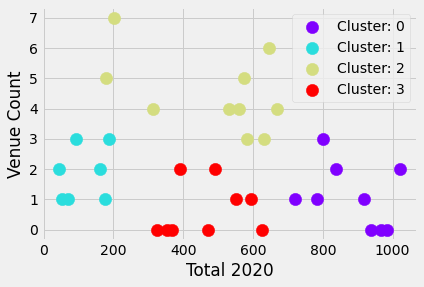

In [91]:
import matplotlib.cm as cm
import matplotlib.colors as colors
x = np.arange(number_of_clusters)
ys = [i + x + (i*x)**2 for i in range(number_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
labels = []
label = ""
label_found = False
label_name = ""
for index, row in df_neighborhoods_pets_sorted.sort_values(by=["Cluster Labels"]).iterrows():
    for l in labels:
        if "Cluster: " + str(row["Cluster Labels"]) == l:
            label_found = True
    if not label_found:
        labels.append("Cluster: " + str(row["Cluster Labels"]))
        label = "Cluster: " + str(row["Cluster Labels"])
    plt.scatter(row["Total_2020"],row["Venue Count"], c=rainbow[row["Cluster Labels"]], s=150, label = label)
    plt.xlabel("Total 2020")
    plt.ylabel("Venue Count")
    plt.legend()
    label_found = False
    label = ""

### Let's see each cluster in more details:

#### Cluster 0:

In [92]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 0 )].sort_values(by=["Total_2020","Venue Count"])

,Cluster Labels,FSA,Borough,Neighborhood,Total_2020,Venue Count,Venue Density,avg_roc
26,0,M4S,Central Toronto,Davisville,720.0,1.0,0.138889,-1.506251
15,0,M4K,East Toronto,The Danforth West,784.0,1.0,0.127551,-2.541566
16,0,M6K,West Toronto,Brockton,801.0,3.0,0.374532,1.638185
0,0,M5A,Downtown Toronto,Regent Park,837.0,2.0,0.238949,5.355950
31,0,M5V,Downtown Toronto,CN Tower,918.0,1.0,0.108932,5.613540
12,0,M4J,East York,East Toronto,939.0,0.0,0.000000,-2.918603
11,0,M6H,West Toronto,Dufferin,966.0,0.0,0.000000,-1.241449
17,0,M4L,East Toronto,India Bazaar,985.0,0.0,0.000000,-1.675971
22,0,M6P,West Toronto,High Park,1022.0,2.0,0.195695,-0.319605


As we can see, the density of veterinary venues is very low compared to number of pets. Some neighborhoods have good positive year over year rate of change in pets registration and some have no veterinary venues in the range of 1,500m from the center of the neighborhood. The following neighborhoods are good candidates for the veterinary service location: CN Tower, India Bazaar, Dufferin, East Toronto

**CN Tower neighborhood:** Located in downtown core, close to the major highways Gardiner and Don Valley Parkway, with 918 registered pets in 2020, only one existing veterinary venue and average YoY rate of change of 5.61% is definitely a good location for a veterinary service.

**India Bazaar** is another great neighborhood to open a veterinary venue. The average YoY rate of change in pets registration is -1.68% but there are no other venues nearby and the number of registered pets is 985. This neighborhood is also close to the major highways, Gardiner and DVP, which makes it easily accessible.

**Dufferin neighborhood** is very similar to India Bazaar. The number of registered cats and dogs in 2020 was 966. The average YoY rate of change in pets registration is -1.24% and there are no other venues nearby. This is clearly a good location to open a veterinary venue.

**East Toronto** neighborhood has slightly lower YoY rate of change in pets registration than the previous two neighborhoods that we mentioned above (-2.92%), but a large number of  registered cats and dogs in 2020 (939) and no other venues nearby make it also a good location for a veterinary service.


#### Cluster 1:

In [93]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 1)].sort_values(by=["Total_2020","Venue Count"])

,Cluster Labels,FSA,Borough,Neighborhood,Total_2020,Venue Count,Venue Density,avg_roc
10,1,M5H,Downtown Toronto,Richmond,43.0,2.0,4.651163,8.161113
2,1,M5C,Downtown Toronto,St. James Town,52.0,1.0,1.923077,-0.447088
9,1,M4H,East York,Thorncliffe Park,70.0,1.0,1.428571,-1.833908
7,1,M5G,Downtown Toronto,Central Bay Street,92.0,3.0,3.260870,4.581226
13,1,M5J,Downtown Toronto,Harbourfront East,162.0,2.0,1.234568,3.395224
4,1,M5E,Downtown Toronto,Berczy Park,176.0,1.0,0.568182,10.445688
1,1,M5B,Downtown Toronto,Garden District,186.0,3.0,1.612903,4.864994


In [106]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 1)].describe()

,Cluster Labels,Total_2020,Venue Count,Venue Density,avg_roc
count,7.0,7.000000,7.000000,7.000000,7.000000
mean,1.0,111.571429,1.857143,2.097048,4.166750
std,0.0,61.367356,0.899735,1.394681,4.357560
min,1.0,43.000000,1.000000,0.568182,-1.833908
25%,1.0,61.000000,1.000000,1.331570,1.474068
50%,1.0,92.000000,2.000000,1.612903,4.581226
75%,1.0,169.000000,2.500000,2.591973,6.513053
max,1.0,186.000000,3.000000,4.651163,10.445688


The density of veterinary venues is much higher compared to cluster 0, due to the low pets number. 

**Berczy Park** has a high average YoY rate of change of 10.45%. This neighborhood is located at downtown core, close to the major highways. It is an area with many parks and a fountain with statues of 27 dogs and a cat. What makes this neighborhood less attractive for opening a veterinary venue than the other locations that we explored is low number of cats and dogs (only 176) and there is already one veterinary service in the area.

#### Cluster 2:

In [95]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 2)].sort_values(by=["Total_2020","Venue Count"])

,Cluster Labels,FSA,Borough,Neighborhood,Total_2020,Venue Count,Venue Density,avg_roc
29,2,M5T,Downtown Toronto,Kensington Market,179.0,5.0,2.793296,-0.757754
27,2,M5S,Downtown Toronto,University of Toronto,202.0,7.0,3.465347,1.018999
33,2,M4X,Downtown Toronto,St. James Town,314.0,4.0,1.273885,-1.737794
3,2,M6C,York,Humewood-Cedarvale,531.0,4.0,0.753296,-2.984232
34,2,M4Y,Downtown Toronto,Church and Wellesley,561.0,4.0,0.713012,3.946533
24,2,M5R,Central Toronto,The Annex,575.0,5.0,0.869565,-0.227871
18,2,M4M,East Toronto,Studio District,584.0,3.0,0.513699,0.975394
25,2,M6R,West Toronto,Parkdale,632.0,3.0,0.474684,-2.662169
8,2,M6G,Downtown Toronto,Christie,646.0,6.0,0.928793,-2.343140
14,2,M6J,West Toronto,Little Portugal,668.0,4.0,0.598802,0.210017


In [96]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 2)].describe()

,Cluster Labels,Total_2020,Venue Count,Venue Density,avg_roc
count,10.0,10.000000,10.000000,10.000000,10.000000
mean,2.0,489.200000,4.500000,1.238438,-0.456202
std,0.0,185.472849,1.269296,1.034894,2.125426
min,2.0,179.000000,3.000000,0.474684,-2.984232
25%,2.0,368.250000,4.000000,0.627355,-2.191803
50%,2.0,568.000000,4.000000,0.811430,-0.492813
75%,2.0,620.000000,5.000000,1.187612,0.784050
max,2.0,668.000000,7.000000,3.465347,3.946533


Cluster 2 contains more veterinary venues than the previous two clusters and the number of registered pets is similar to the number of pets in cluster 1. There are three neighborhoods in this cluster with over 600 registered pets in 2020 but the year over year is close to 0 or negative. This cluster of neighborhoods does not look like a good choice for a new veterinary service location compared to the previous two clusters.

#### Cluster 3:

In [97]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 3)].sort_values(by=["Total_2020","Venue Count"])

,Cluster Labels,FSA,Borough,Neighborhood,Total_2020,Venue Count,Venue Density,avg_roc
19,3,M5N,Central Toronto,Roselawn,324.0,0.0,0.000000,-1.178214
28,3,M4T,Central Toronto,Moore Park,352.0,0.0,0.000000,-2.740607
23,3,M4R,Central Toronto,North Toronto West,367.0,0.0,0.000000,-0.237512
32,3,M4W,Downtown Toronto,Rosedale,392.0,2.0,0.510204,-2.670048
21,3,M5P,Central Toronto,Forest Hill North & West,470.0,0.0,0.000000,0.020979
30,3,M4V,Central Toronto,Summerhill West,492.0,2.0,0.406504,-0.676786
20,3,M4P,Central Toronto,Davisville North,550.0,1.0,0.181818,2.401422
6,3,M4G,East York,Leaside,594.0,1.0,0.168350,-2.209854
5,3,M6E,York,Caledonia-Fairbanks,627.0,0.0,0.000000,-4.049466


In [98]:
df_neighborhoods_pets_sorted[["Cluster Labels","FSA","Borough","Neighborhood","Total_2020","Venue Count","Venue Density","avg_roc"]].loc[(df_neighborhoods_pets_sorted['Cluster Labels'] == 3)].describe()

,Cluster Labels,Total_2020,Venue Count,Venue Density,avg_roc
count,9.0,9.000000,9.000000,9.000000,9.000000
mean,3.0,463.111111,0.666667,0.140764,-1.260010
std,0.0,110.913755,0.866025,0.196412,1.913864
min,3.0,324.000000,0.000000,0.000000,-4.049466
25%,3.0,367.000000,0.000000,0.000000,-2.670048
50%,3.0,470.000000,0.000000,0.000000,-1.178214
75%,3.0,550.000000,1.000000,0.181818,-0.237512
max,3.0,627.000000,2.000000,0.510204,2.401422


In average, this cluster has the lowest venue count and the venue density is slightly higher than in cluster 0. There are a few neighborhoods with no veterinary venues. One of them, Caledonia-Fairbanks has 627 registered pets, but the average year over year is -4%. Other candidates from this cluster are the North Toronto West and Roselawn neighborhoods. We will display these locations on the map and compare with other neighborhoods. We will also take a look at few other neighborhoods in this cluster.

In [99]:
df_neighborhoods_pets_sorted.sort_values(by=['Venue Density']).head()

,Cluster Labels,FSA,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Distance to Downtown,Total_2013,Total_2014,Total_2015,Total_2016,Total_2017,Total_2018,Total_2019,Total_2020,Venue Count,Venue Density,avg_roc
21,3,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,5036.429230,851.0,884.0,899.0,906.0,954.0,945.0,845.0,470.0,0.0,0.0,0.020979
12,0,M4J,East York,East Toronto,43.685347,-79.338106,5282.454020,1725.0,1752.0,1665.0,1693.0,1681.0,1555.0,1437.0,939.0,0.0,0.0,-2.918603
17,0,M4L,East Toronto,India Bazaar,43.668999,-79.315572,6074.808551,1880.0,1879.0,1904.0,1805.0,1828.0,1805.0,1694.0,985.0,0.0,0.0,-1.675971
11,0,M6H,West Toronto,Dufferin,43.669005,-79.442259,4629.283206,1604.0,1534.0,1641.0,1663.0,1761.0,1732.0,1461.0,966.0,0.0,0.0,-1.241449
23,3,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,6874.929062,620.0,586.0,599.0,583.0,651.0,641.0,605.0,367.0,0.0,0.0,-0.237512


In [108]:
# create map
# Matplotlib and associated plotting modules

from folium.features import DivIcon
map_clusters = folium.Map(location=toronto_downtown, zoom_start=13)

# set color scheme for the clusters
x = np.arange(number_of_clusters)
ys = [i + x + (i*x)**2 for i in range(number_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.Marker(toronto_downtown, popup='Toronto').add_to(map_clusters)
for i in range(0,len(df_neighborhoods_pets_sorted)):  
    folium.Marker([df_neighborhoods_pets_sorted.iloc[i]['Neighborhood Latitude'], df_neighborhoods_pets_sorted.iloc[i]['Neighborhood Longitude']], icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 8pt;font-weight:bold">' + df_neighborhoods_pets_sorted.iloc[i]['Neighborhood'] + '</div>',
        )).add_to(map_clusters)
    folium.Circle(
      location=[df_neighborhoods_pets_sorted.iloc[i]['Neighborhood Latitude'], df_neighborhoods_pets_sorted.iloc[i]['Neighborhood Longitude']],
      popup=df_neighborhoods_pets_sorted.iloc[i]['FSA'] + ":" + str(df_neighborhoods_pets_sorted.iloc[i]['Total_2020']),
      radius=float(df_neighborhoods_pets_sorted.iloc[i]['Total_2020'])/1.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
    ).add_to(map_clusters)
    
# add markers to the map
markers_colors = []
for lat, lon, nb, cluster, pets, ven, den, avgroc in zip(df_neighborhoods_pets_sorted['Neighborhood Latitude'], df_neighborhoods_pets_sorted['Neighborhood Longitude'], 
                                    df_neighborhoods_pets_sorted['Neighborhood'],df_neighborhoods_pets_sorted['Cluster Labels'], 
                                    df_neighborhoods_pets_sorted['Total_2020'].astype(int), df_neighborhoods_pets_sorted['Venue Count'].astype(int).astype(str), 
                                    df_neighborhoods_pets_sorted['Venue Density'], df_neighborhoods_pets_sorted['avg_roc']):
    label = folium.Popup(str(nb) + " Pets:" + str(round(pets,2)) + " Venues: " + ven +" Avg YoY% change: " + str(round(avgroc,2)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=str(nb) + "</br>Pets:" + str(round(pets,2)) + "</br>Venues: " + ven + "</br>Density: " + str(round(den,2)) +"</br>Avg YoY% change: " + str(round(avgroc,2)),
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.9).add_to(map_clusters)
    

folium.Marker(toronto_downtown, popup='Toronto').add_to(map_clusters)
for lat, lng, venue in zip(df_all_veterinary_venues['Venue Latitude'], df_all_veterinary_venues['Venue Longitude'], df_all_veterinary_venues['Venue Name']):
    label = '{}'.format(venue)
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='grey',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_clusters)
HeatMap(heat_data).add_to(map_clusters)       
map_clusters

## Conclusion

Using the licensed dogs and cats report by forward station area (FSA) from the Toronto Open Data Portal, list of Toronto neighborhoods with FSA from Wikipedia, number and location of existing veterinary clinics in each neighborhood, obtained using the FourSquare API, K-Means clustering algorithm and data exploration and analysis we identified the locations that the stakeholders should be using as a starting point for the final exploration and decision.

These locations are the following neighborhoods: **CN Tower, India Bazaar, Dufferin and East Toronto**. The red arrows indicate the position of these locations on the above map.

The stakeholders should also explore the **North Toronto West** and **Roselawn** neighborhoods in the central Toronto area. These locations are relatively far from downtown Toronto compared to other good locations that we found but there are no veterinary venues nearby and the commercial rent could be significantly lower in this area. The blue arrows indicate the position of these locations on the above map.


## Future Works

Improve the accuracy of the model by including the commercial rent and demographics data that can be obtained from Statistics Canada.</br>
Commercial rents indexes for retail, office and industrial buildings is important information as well as the population density, structure, and growth.